In [1]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from Preprocessing.preprocess import baseline_als, modified_z_score, fixer, split_data
import os
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Data Acquisition and Loading

In [2]:
def read_data(path, file_name=''):
    # Get all files in the folder
    files = os.listdir(path)
    # Read all files
    data = []
    for file in files:
        if file.endswith('.txt') and file.startswith(file_name):
            data.append(np.genfromtxt(path + file, delimiter='\t'))
    return data

In [3]:
chicken_path = './Data Lemak/pure fat/chicken/'
data_chicken = []
for root, dirs, files in os.walk(chicken_path):
    data = read_data(root+'/')
    if len(data) > 0:
        data_chicken += data

In [4]:
cow_path = './Data Lemak/pure fat/cow/'
data_cow = []
for root, dirs, files in os.walk(cow_path):
    data = read_data(root+'/')
    if len(data) > 0:
        data_cow += data

In [5]:
duck_path = './Data Lemak/pure fat/duck/'
data_duck = []
for root, dirs, files in os.walk(duck_path):
    data = read_data(root+'/')
    if len(data) > 0:
        data_duck += data

In [6]:
goat_path = './Data Lemak/pure fat/goat/'
data_goat = []
for root, dirs, files in os.walk(goat_path):
    data = read_data(root+'/')
    if len(data) > 0:
        data_goat += data

In [7]:
pig_b_path = './Data Lemak/pure fat/pig(b)/'
data_pig_b = []
for root, dirs, files in os.walk(pig_b_path):
    data = read_data(root+'/')
    if len(data) > 0:
        data_pig_b += data

In [8]:
pig_p_path = './Data Lemak/pure fat/pig(p)/'
data_pig_p = []
for root, dirs, files in os.walk(pig_p_path):
    data = read_data(root+'/')
    if len(data) > 0:
        data_pig_p += data

In [9]:
pig_rj_path = './Data Lemak/pure fat/pig(rj)/'
data_pig_rj = []
for root, dirs, files in os.walk(pig_rj_path):
    data = read_data(root+'/')
    if len(data) > 0:
        data_pig_rj += data

In [10]:
pig_s_path = './Data Lemak/pure fat/pis(s)/'
data_pig_s = []
for root, dirs, files in os.walk(pig_s_path):
    data = read_data(root+'/')
    if len(data) > 0:
        data_pig_s += data

# Chicken

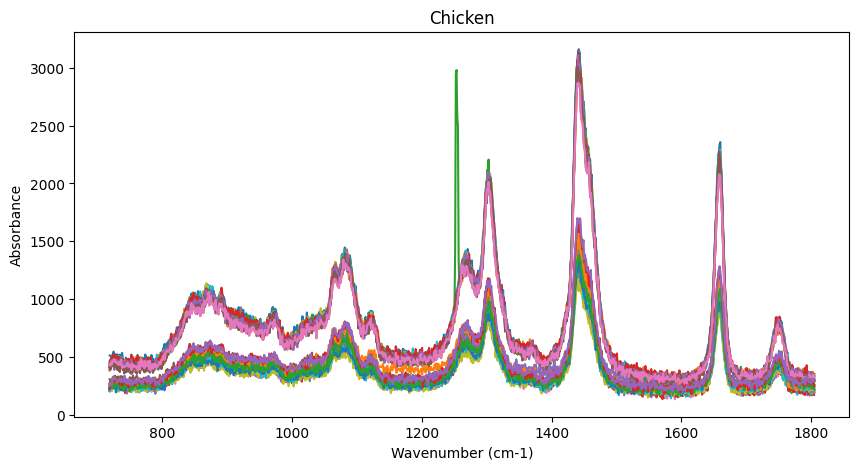

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(0, len(data_chicken)):
    ax.plot(data_chicken[i][:,0], data_chicken[i][:,1], label='Ayam ' + str(i+1))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Chicken')
plt.show()

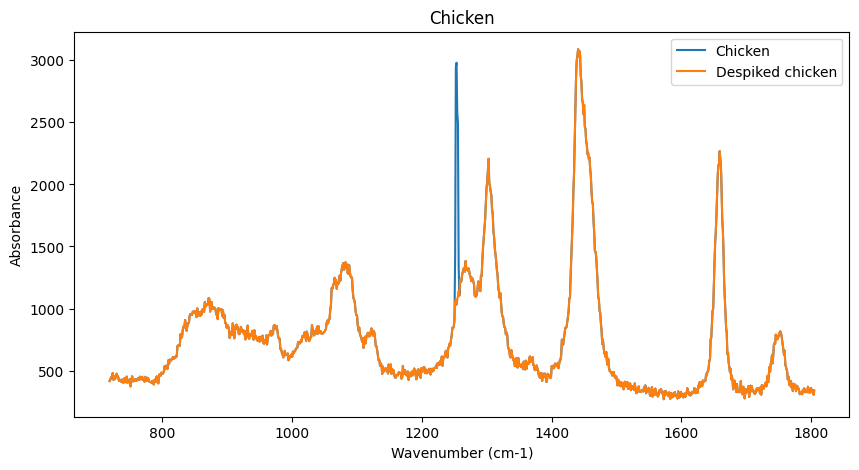

In [12]:
despike_12 = fixer(fixer(data_chicken[12][:,1], 20, threshold=7), 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_chicken[12][:,0], data_chicken[12][:,1], label='Chicken')
ax.plot(data_chicken[12][:,0], despike_12[:], label='Despiked chicken')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Chicken')
plt.legend()
plt.show()

In [13]:
data_chicken[12][:,1] = despike_12

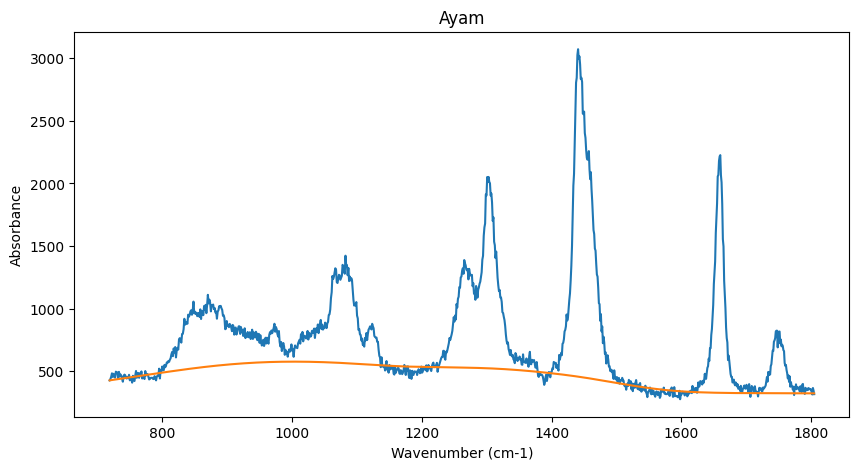

In [14]:
baseline_= baseline_als(data_chicken[1][:,1], 10000000, 0.02)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_chicken[1][:,0], data_chicken[1][:,1])
ax.plot(data_chicken[0][:,0], baseline_)
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Ayam')
plt.show()

In [15]:
df_chicken = data_chicken[0][:,0]
for i in range(0, len(data_chicken)):
    # Baseline correction
    baseline_= baseline_als(data_chicken[i][:,1], 1000000, 0.005)
    df_chicken = np.vstack((df_chicken, data_chicken[i][:,1] - baseline_))
df_chicken = np.transpose(df_chicken)
scaler = StandardScaler()
df_chicken_scaled = scaler.fit_transform(df_chicken[:,1:]) + 1
df_chicken_scaled = np.hstack((df_chicken[:,0].reshape(-1,1), df_chicken_scaled))

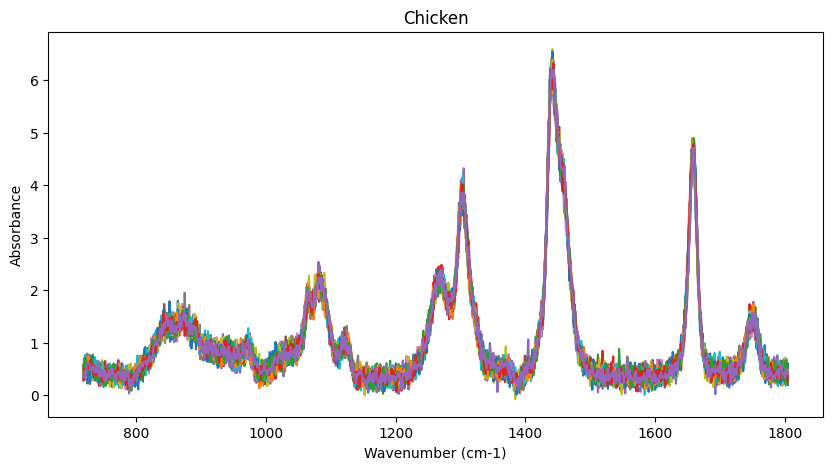

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(1, df_chicken_scaled.shape[1]):
    ax.plot(df_chicken_scaled[:,0], df_chicken_scaled[:,i], label='Ayam ' + str(i+1))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Chicken')
plt.show()

In [19]:
chicken = np.mean(df_chicken_scaled[:, 1:], axis=1)
#chicken[1800:1860] = fixer(chicken[1800:1860], 10)
chicken_filtered = savgol_filter(chicken, 20, 3)

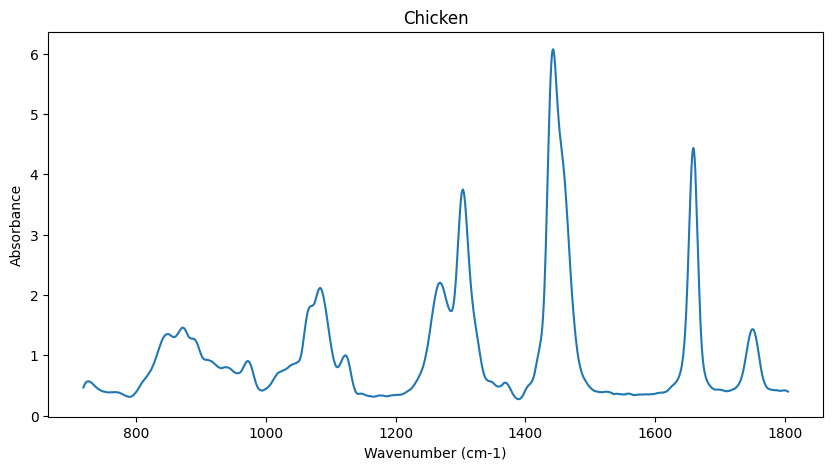

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_chicken[:,0], chicken_filtered)
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Chicken')
plt.show()

In [21]:
if not os.path.exists('./Data Lemak/preprocessed/pure fat/chicken/'):
    os.makedirs('./Data Lemak/preprocessed/pure fat/chicken/')
pd.DataFrame(df_chicken_scaled).to_csv('./Data Lemak/preprocessed/pure fat/chicken/chicken_all.csv', index=False, header=False)
pd.DataFrame([df_chicken[:,0], chicken_filtered]).T.to_csv('./Data Lemak/preprocessed/pure fat/chicken/chicken_mean.csv', index=False, header=False)

# Cow

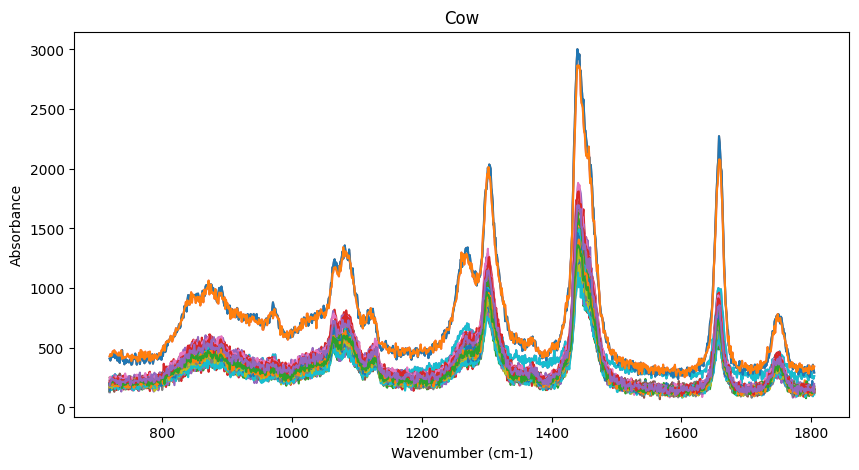

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(0, len(data_cow)):
    ax.plot(data_cow[i][:,0], data_cow[i][:,1], label='Cow ' + str(i+1))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Cow')
plt.show()

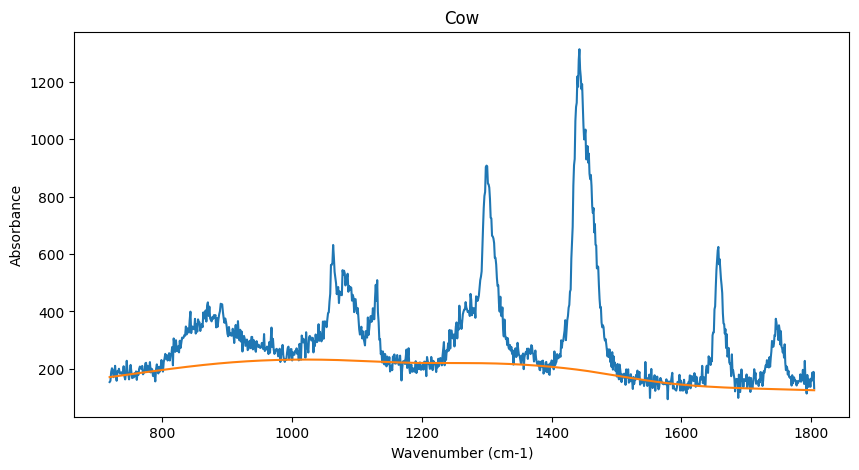

In [23]:
baseline_= baseline_als(data_cow[1][:,1], 10000000, 0.02)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_cow[1][:,0], data_cow[1][:,1])
ax.plot(data_cow[0][:,0], baseline_)
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Cow')
plt.show()

In [24]:
df_cow = data_cow[0][:,0]
for i in range(0, len(data_cow)):
    # Baseline correction
    baseline_= baseline_als(data_cow[i][:,1], 1000000, 0.005)
    df_cow = np.vstack((df_cow, data_cow[i][:,1] - baseline_))
df_cow = np.transpose(df_cow)
scaler = StandardScaler()
df_cow_scaled = scaler.fit_transform(df_cow[:,1:]) + 1
df_cow_scaled = np.hstack((df_cow[:,0].reshape(-1,1), df_cow_scaled))

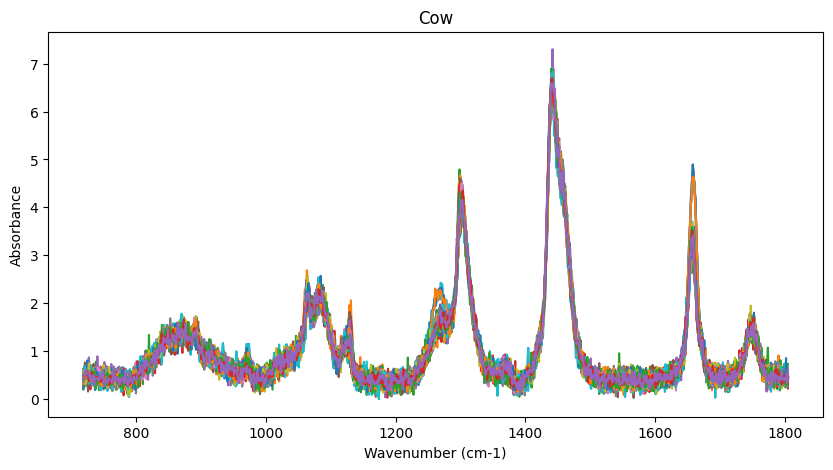

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(1, df_cow_scaled.shape[1]):
    ax.plot(df_cow_scaled[:,0], df_cow_scaled[:,i], label='Cow ' + str(i+1))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Cow')
plt.show()

In [26]:
cow = np.mean(df_cow_scaled[:, 1:], axis=1)
#cow[1800:1860] = fixer(cow[1800:1860], 10)
cow_filtered = savgol_filter(cow, 20, 3)

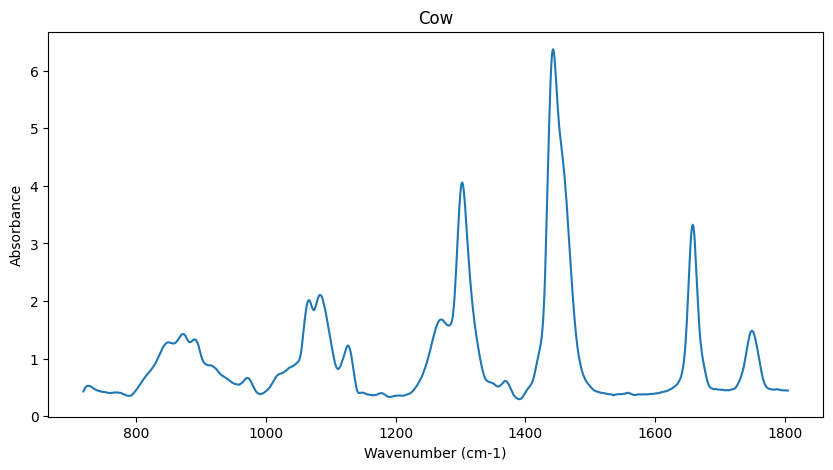

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_cow[:,0], cow_filtered)
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Cow')
plt.show()

In [28]:
if not os.path.exists('./Data Lemak/preprocessed/pure fat/cow/'):
    os.makedirs('./Data Lemak/preprocessed/pure fat/cow/')
pd.DataFrame(df_cow_scaled).to_csv('./Data Lemak/preprocessed/pure fat/cow/cow_all.csv', index=False, header=False)
pd.DataFrame([df_cow[:,0], cow_filtered]).T.to_csv('./Data Lemak/preprocessed/pure fat/cow/cow_mean.csv', index=False, header=False)

# Duck

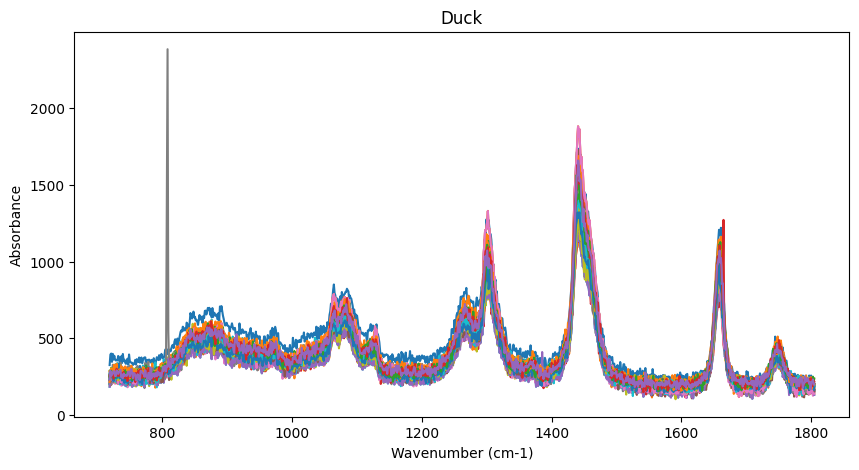

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(0, len(data_duck)):
    ax.plot(data_duck[i][:,0], data_duck[i][:,1], label='Duck ' + str(i+1))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Duck')
plt.show()

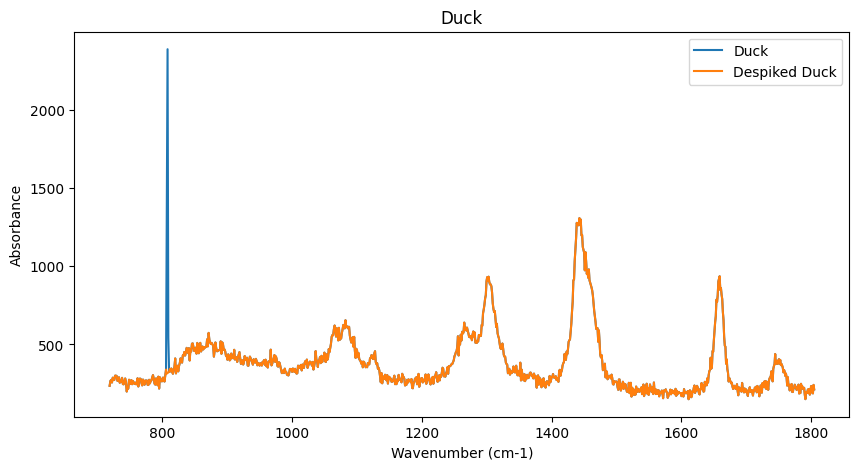

In [30]:
despike_37 = fixer(data_duck[37][:,1], 20, threshold=7)#, 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_duck[37][:,0], data_duck[37][:,1], label='Duck')
ax.plot(data_duck[37][:,0], despike_37[:], label='Despiked Duck')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Duck')
plt.legend()
plt.show()

In [31]:
data_duck[37][:,1] = despike_37

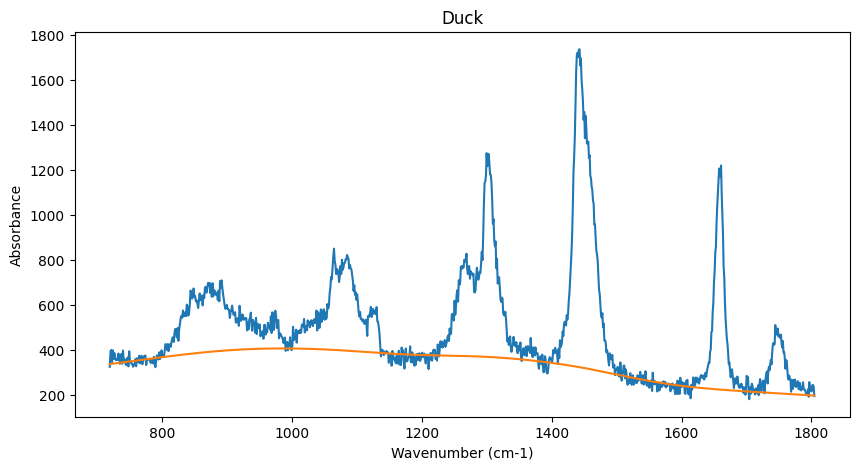

In [32]:
baseline_= baseline_als(data_duck[0][:,1], 10000000, 0.02)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_duck[0][:,0], data_duck[0][:,1])
ax.plot(data_duck[0][:,0], baseline_)
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Duck')
plt.show()

In [33]:
df_duck = data_duck[0][:,0]
for i in range(0, len(data_duck)):
    # Baseline correction
    baseline_= baseline_als(data_duck[i][:,1], 1000000, 0.005)
    df_duck = np.vstack((df_duck, data_duck[i][:,1] - baseline_))
df_duck = np.transpose(df_duck)
scaler = StandardScaler()
df_duck_scaled = scaler.fit_transform(df_duck[:,1:]) + 1
df_duck_scaled = np.hstack((df_duck[:,0].reshape(-1,1), df_duck_scaled))

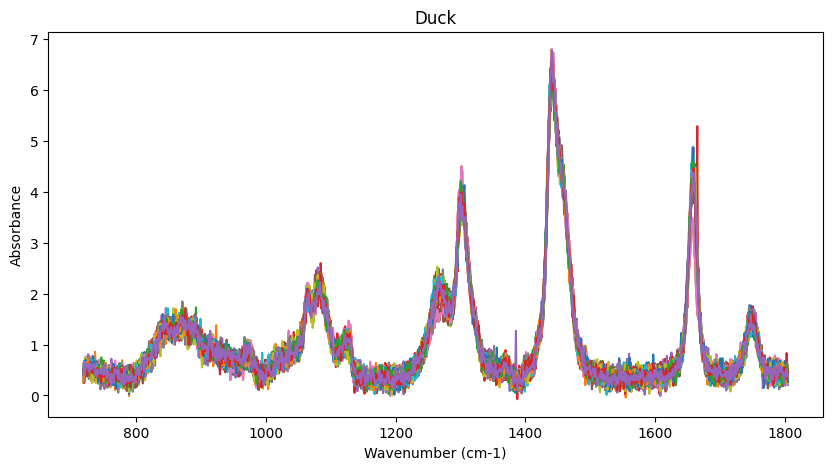

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(1, df_duck_scaled.shape[1]):
    ax.plot(df_duck_scaled[:,0], df_duck_scaled[:,i], label='Duck ' + str(i+1))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Duck')
plt.show()

In [35]:
duck = np.mean(df_duck_scaled[:, 1:], axis=1)
#duck[1800:1860] = fixer(duck[1800:1860], 10)
duck_filtered = savgol_filter(duck, 20, 3)

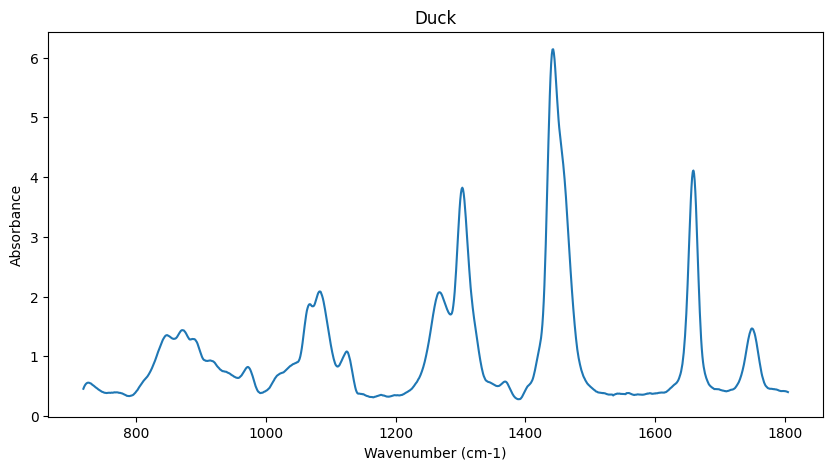

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_duck[:,0], duck_filtered)
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Duck')
plt.show()

In [37]:
if not os.path.exists('./Data Lemak/preprocessed/pure fat/duck/'):
    os.makedirs('./Data Lemak/preprocessed/pure fat/duck/')
pd.DataFrame(df_duck_scaled).to_csv('./Data Lemak/preprocessed/pure fat/duck/duck_all.csv', index=False, header=False)
pd.DataFrame([df_duck[:,0], duck_filtered]).T.to_csv('./Data Lemak/preprocessed/pure fat/duck/duck_mean.csv', index=False, header=False)

# Goat

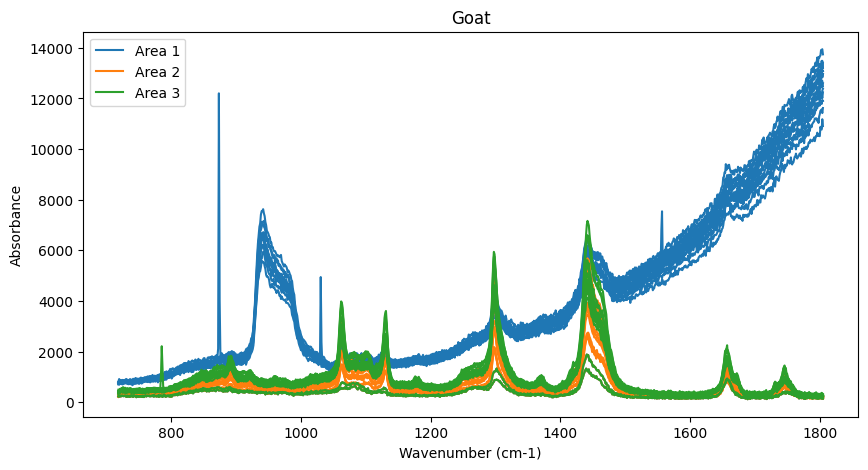

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(0, len(data_goat)):
    ax.plot(data_goat[i][:,0], data_goat[i][:,1], color='C' + str(i // 15))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Goat')
plt.plot([], [], c='C0', label='Area 1')
plt.plot([], [], c='C1', label='Area 2')
plt.plot([], [], c='C2', label='Area 3')
plt.legend()
plt.show()

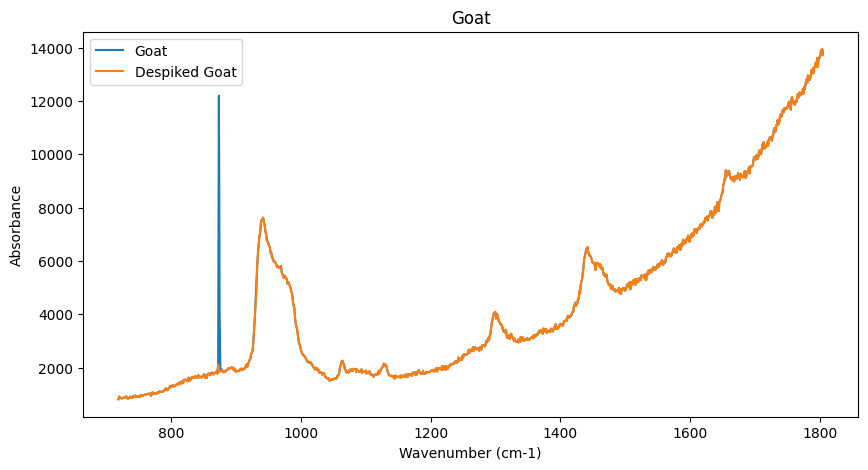

In [39]:
i = 1
despike_1 = fixer(data_goat[1][:,1], 20, threshold=7)#, 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_goat[1][:,0], data_goat[1][:,1], label='Goat')
ax.plot(data_goat[1][:,0], despike_1[:], label='Despiked Goat')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Goat')
plt.legend()
plt.show()

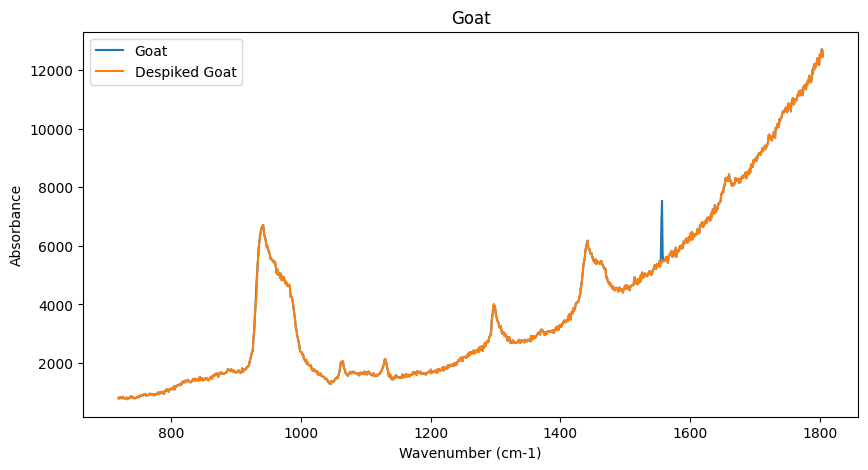

In [40]:
i = 3
despike_3 = fixer(data_goat[3][:,1], 20, threshold=7)#, 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_goat[3][:,0], data_goat[3][:,1], label='Goat')
ax.plot(data_goat[3][:,0], despike_3[:], label='Despiked Goat')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Goat')
plt.legend()
plt.show()

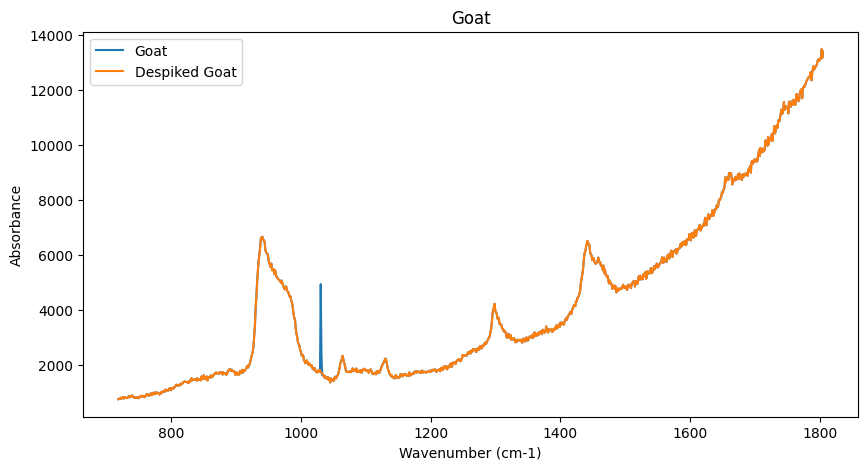

In [41]:
i = 11
despike_11 = fixer(data_goat[11][:,1], 20, threshold=7)#, 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_goat[11][:,0], data_goat[11][:,1], label='Goat')
ax.plot(data_goat[11][:,0], despike_11[:], label='Despiked Goat')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Goat')
plt.legend()
plt.show()

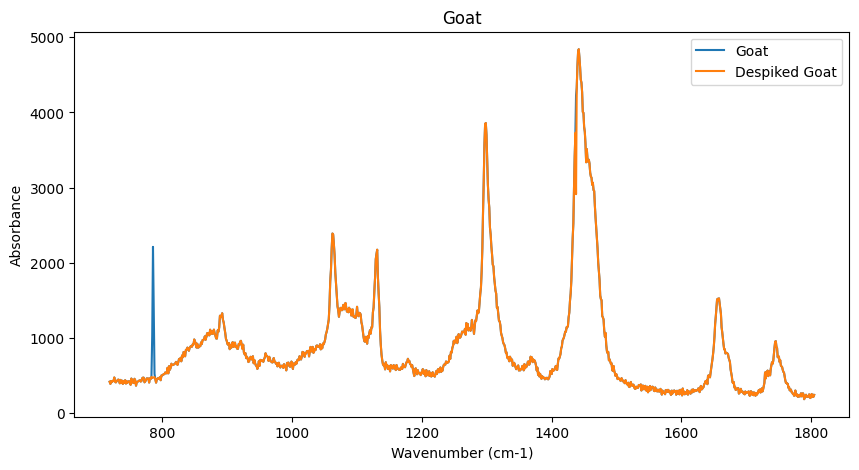

In [42]:
i = 42
despike_42 = fixer(data_goat[42][:,1], 20, threshold=10)#, 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_goat[42][:,0], data_goat[42][:,1], label='Goat')
ax.plot(data_goat[42][:,0], despike_42[:], label='Despiked Goat')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Goat')
plt.legend()
plt.show()

In [43]:
data_goat[1][:,1] = despike_1
data_goat[3][:,1] = despike_3
data_goat[11][:,1] = despike_11
data_goat[42][:,1] = despike_42

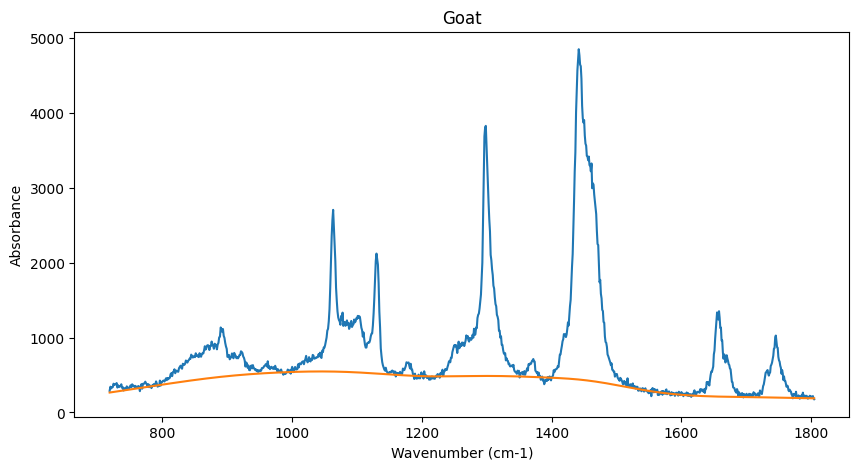

In [44]:
baseline_= baseline_als(data_goat[16][:,1], 1000000, 0.005)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_goat[16][:,0], data_goat[16][:,1])
ax.plot(data_goat[16][:,0], baseline_)
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Goat')
plt.show()

In [45]:
df_goat = data_goat[16][:,0]
for i in range(16, len(data_goat)):
    # Baseline correction
    baseline_= baseline_als(data_goat[i][:,1], 1000000, 0.005)
    df_goat = np.vstack((df_goat, data_goat[i][:,1] - baseline_))
df_goat = np.transpose(df_goat)
scaler = StandardScaler()
df_goat_scaled = scaler.fit_transform(df_goat[:,1:]) + 1
df_goat_scaled = np.hstack((df_goat[:,0].reshape(-1,1), df_goat_scaled))

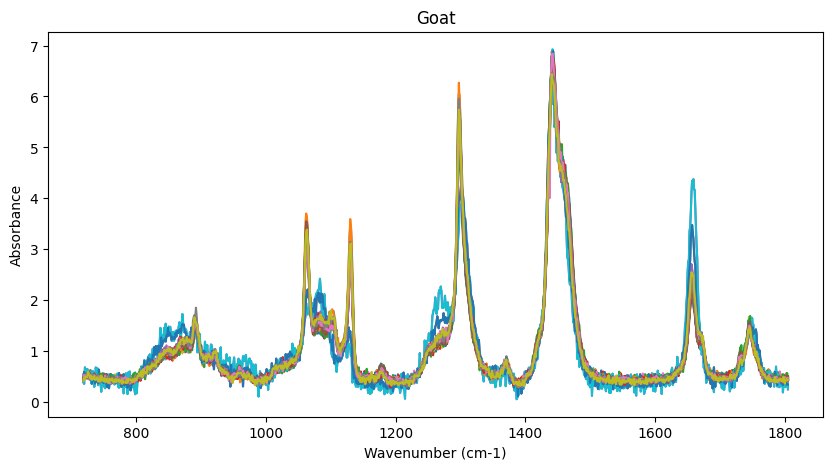

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(1, df_goat_scaled.shape[1]):
    ax.plot(df_goat_scaled[:,0], df_goat_scaled[:,i], label='Goat ' + str(i+1))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Goat')
plt.show()

In [47]:
goat = np.mean(df_goat_scaled[:, 1:], axis=1)
#goat[1800:1860] = fixer(goat[1800:1860], 10)
goat_filtered = savgol_filter(goat, 20, 3)

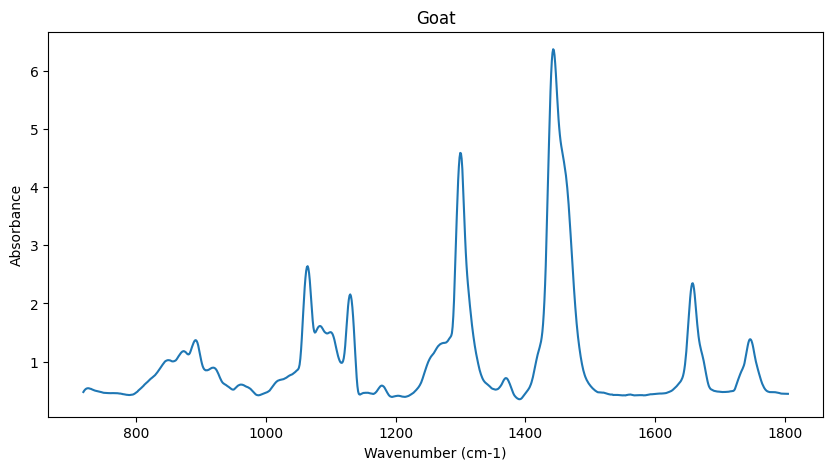

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_goat[:,0], goat_filtered)
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Goat')
plt.show()

In [49]:
if not os.path.exists('./Data Lemak/preprocessed/pure fat/goat/'):
    os.makedirs('./Data Lemak/preprocessed/pure fat/goat/')
pd.DataFrame(df_goat_scaled).to_csv('./Data Lemak/preprocessed/pure fat/goat/goat_all.csv', index=False, header=False)
pd.DataFrame([df_goat[:,0], goat_filtered]).T.to_csv('./Data Lemak/preprocessed/pure fat/goat/goat_mean.csv', index=False, header=False)

# Pig

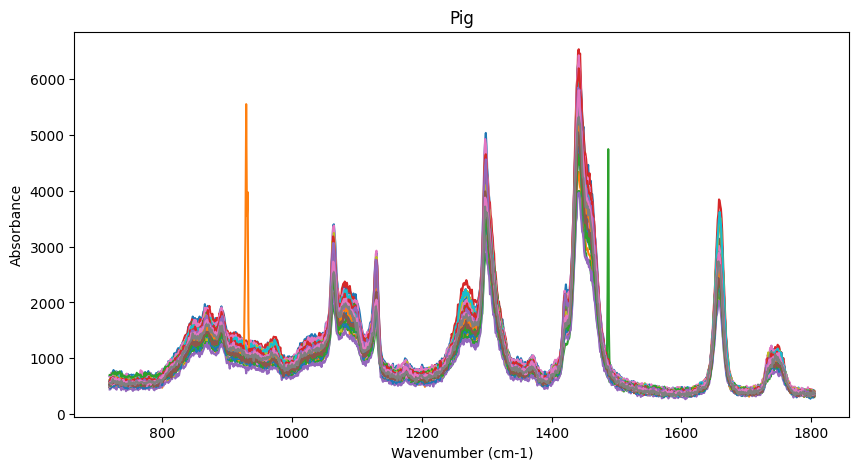

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(0, len(data_pig_s)):
    ax.plot(data_pig_s[i][:,0], data_pig_s[i][:,1], label='Pig ' + str(i+1))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.show()

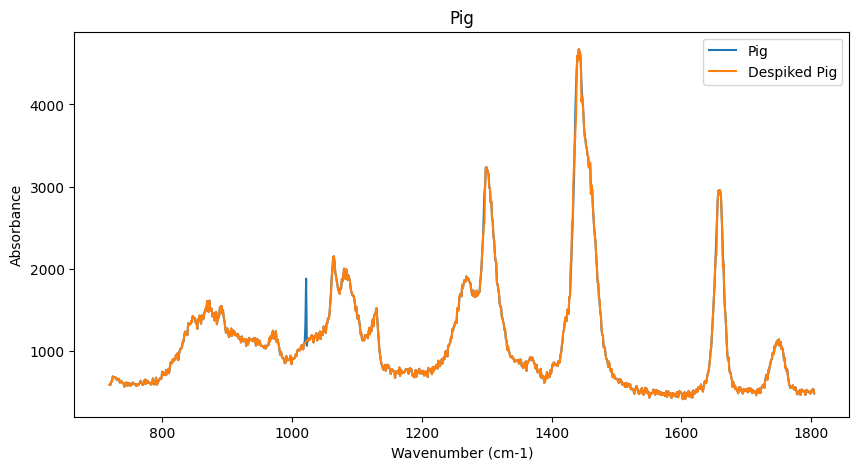

In [51]:
despike_19 = fixer(fixer(data_pig_b[19][:,1], 10, threshold=10), 10, threshold=5)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_pig_b[19][:,0], data_pig_b[19][:,1], label='Pig')
ax.plot(data_pig_b[19][:,0], despike_19[:], label='Despiked Pig')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.legend()
plt.show()

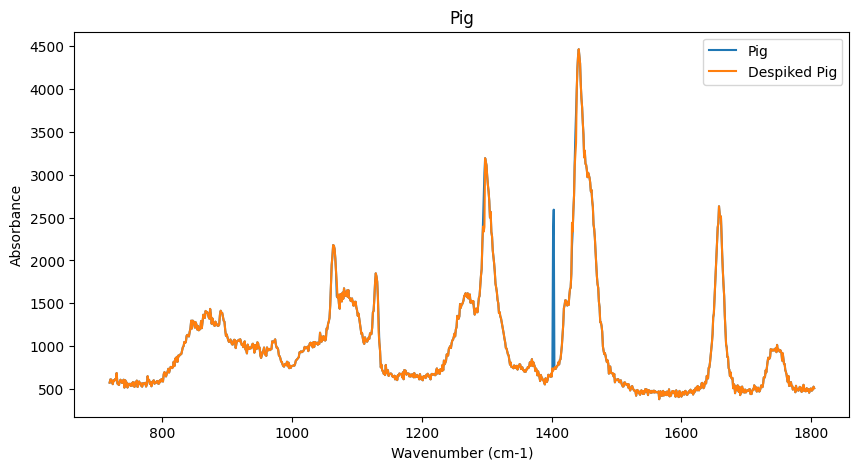

In [52]:
despike_44 = fixer(data_pig_b[44][:,1], 10, threshold=6)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_pig_b[44][:,0], data_pig_b[44][:,1], label='Pig')
ax.plot(data_pig_b[44][:,0], despike_44[:], label='Despiked Pig')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.legend()
plt.show()

In [53]:
data_pig_b[19][:,1] = despike_19
data_pig_b[44][:,1] = despike_44

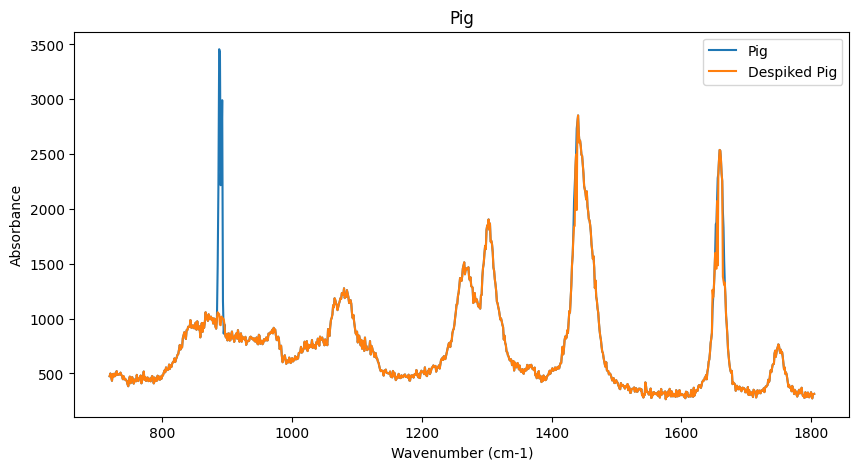

In [54]:
despike_1 = fixer(fixer(data_pig_p[1][:,1], 15, threshold=6), 15, threshold=5)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_pig_p[1][:,0], data_pig_p[1][:,1], label='Pig')
ax.plot(data_pig_p[1][:,0], despike_1[:], label='Despiked Pig')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.legend()
plt.show()

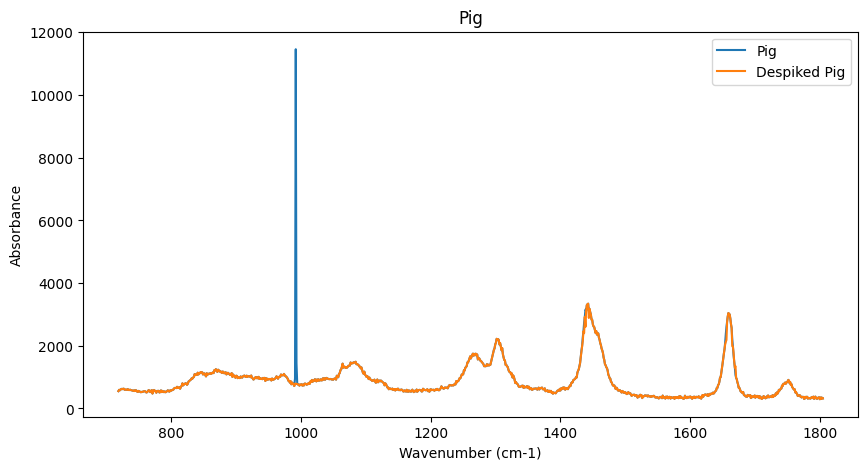

In [55]:
despike_24 = fixer(fixer(data_pig_p[24][:,1], 10), 10, threshold=5)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_pig_p[24][:,0], data_pig_p[24][:,1], label='Pig')
ax.plot(data_pig_p[24][:,0], despike_24[:], label='Despiked Pig')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.legend()
plt.show()

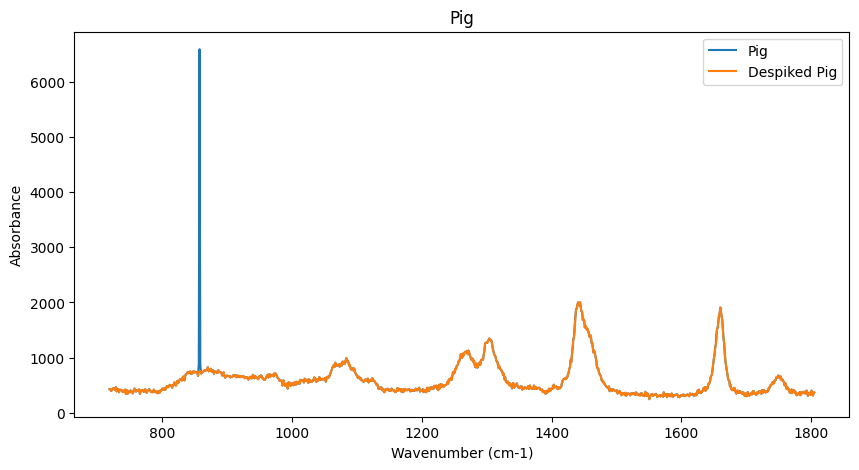

In [56]:
despike_41 = fixer(fixer(data_pig_p[41][:,1], 10), 10, threshold=5)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_pig_p[41][:,0], data_pig_p[41][:,1], label='Pig')
ax.plot(data_pig_p[41][:,0], despike_41[:], label='Despiked Pig')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.legend()
plt.show()

In [57]:
data_pig_p[1][:,1] = despike_1
data_pig_p[24][:,1] = despike_24
data_pig_p[41][:,1] = despike_41

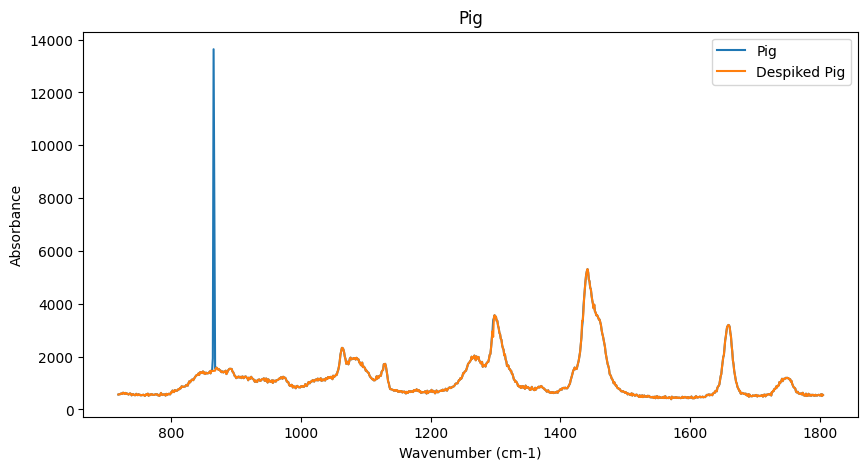

In [58]:
despike_2 = fixer(data_pig_rj[2][:,1], 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_pig_rj[2][:,0], data_pig_rj[2][:,1], label='Pig')
ax.plot(data_pig_rj[2][:,0], despike_2[:], label='Despiked Pig')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.legend()
plt.show()

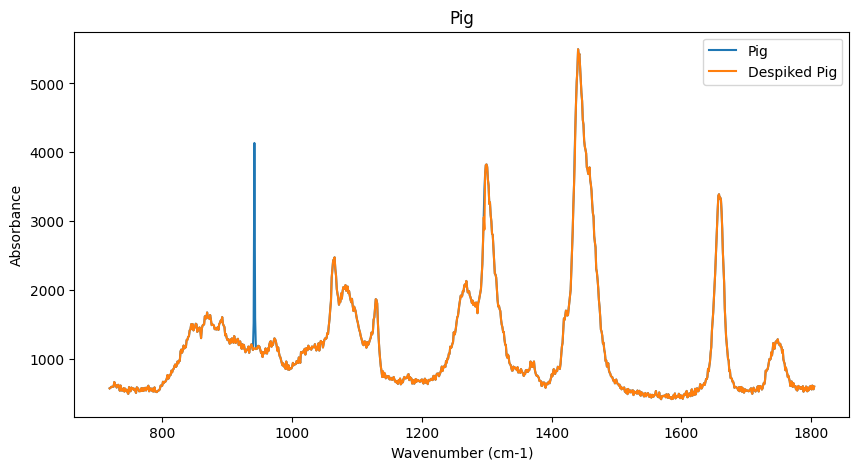

In [59]:
despike_11 = fixer(data_pig_rj[11][:,1], 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_pig_rj[11][:,0], data_pig_rj[11][:,1], label='Pig')
ax.plot(data_pig_rj[11][:,0], despike_11[:], label='Despiked Pig')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.legend()
plt.show()

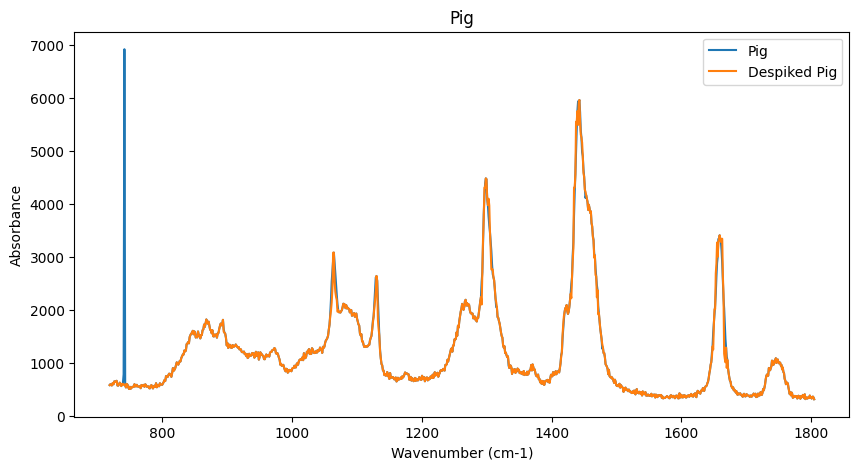

In [60]:
despike_42 = fixer(fixer(data_pig_rj[42][:,1], 5), 5, threshold=3)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_pig_rj[42][:,0], data_pig_rj[42][:,1], label='Pig')
ax.plot(data_pig_rj[42][:,0], despike_42[:], label='Despiked Pig')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.legend()
plt.show()

In [61]:
data_pig_rj[2][:,1] = despike_2
data_pig_rj[11][:,1] = despike_11
data_pig_rj[42][:,1] = despike_42

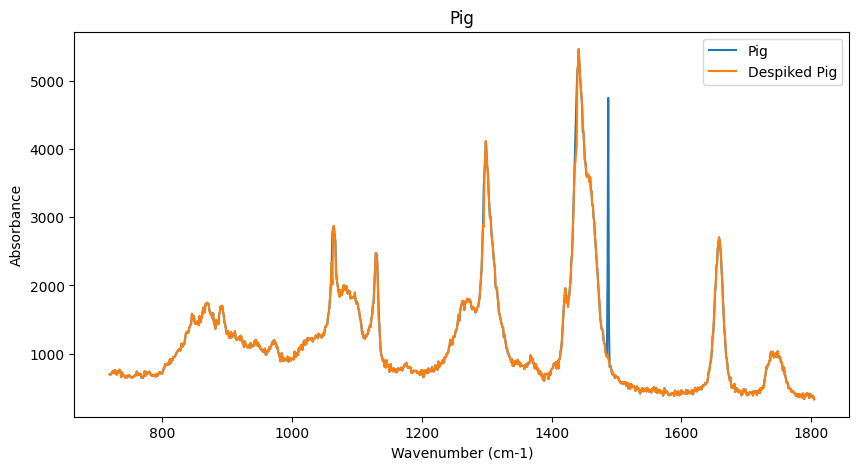

In [62]:
despike_32 = fixer(data_pig_s[32][:,1], 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_pig_s[32][:,0], data_pig_s[32][:,1], label='Pig')
ax.plot(data_pig_s[32][:,0], despike_32[:], label='Despiked Pig')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.legend()
plt.show()

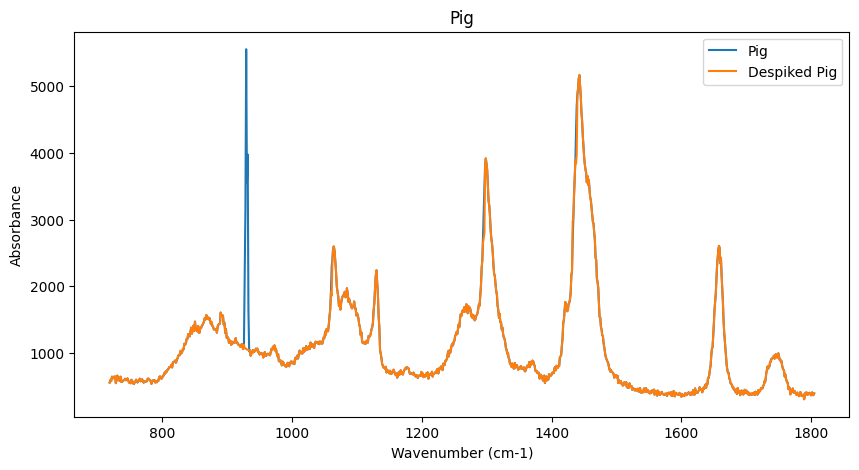

In [63]:
despike_41 = fixer(data_pig_s[41][:,1], 10)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_pig_s[41][:,0], data_pig_s[41][:,1], label='Pig')
ax.plot(data_pig_s[41][:,0], despike_41[:], label='Despiked Pig')
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.legend()
plt.show()

In [64]:
data_pig_s[32][:,1] = despike_32
data_pig_s[41][:,1] = despike_41

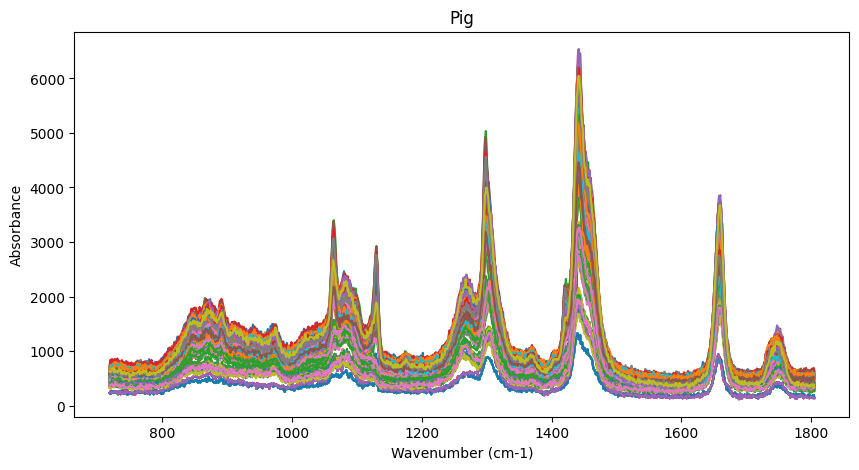

In [65]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(0, len(data_pig_b)):
    ax.plot(data_pig_b[i][:,0], data_pig_b[i][:,1], label='Pig ' + str(i+1))
    ax.plot(data_pig_p[i][:,0], data_pig_p[i][:,1], label='Pig ' + str(i+1))
    ax.plot(data_pig_s[i][:,0], data_pig_s[i][:,1], label='Pig ' + str(i+1))
    if i != 1:
        ax.plot(data_pig_rj[i][:,0], data_pig_rj[i][:,1], label='Pig ' + str(i+1))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.show()

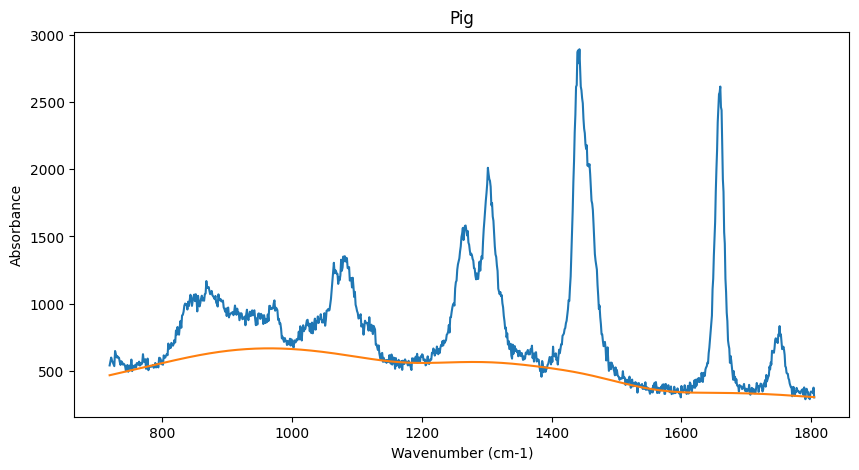

In [66]:
baseline_= baseline_als(data_pig_p[0][:,1], 1000000, 0.005)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_pig_p[0][:,0], data_pig_p[0][:,1])
ax.plot(data_pig_p[0][:,0], baseline_)
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.show()

In [67]:
df_pig = data_pig_b[0][:,0]
for i in range(0, len(data_pig_b)):
    # Baseline correction
    baseline_= baseline_als(data_pig_b[i][:,1], 1000000, 0.005)
    df_pig = np.vstack((df_pig, data_pig_b[i][:,1] - baseline_))
for i in range(0, len(data_pig_p)):
    # Baseline correction
    baseline_= baseline_als(data_pig_p[i][:,1], 1000000, 0.005)
    df_pig = np.vstack((df_pig, data_pig_p[i][:,1] - baseline_))
for i in range(0, len(data_pig_rj)):
    # Baseline correction
    baseline_= baseline_als(data_pig_rj[i][:,1], 1000000, 0.005)
    df_pig = np.vstack((df_pig, data_pig_rj[i][:,1] - baseline_))
for i in range(0, len(data_pig_s)):
    # Baseline correction
    baseline_= baseline_als(data_pig_s[i][:,1], 1000000, 0.005)
    df_pig = np.vstack((df_pig, data_pig_s[i][:,1] - baseline_))
    
df_pig = np.transpose(df_pig)
scaler = StandardScaler()
df_pig_scaled = scaler.fit_transform(df_pig[:,1:]) + 1
df_pig_scaled = np.hstack((df_pig[:,0].reshape(-1,1), df_pig_scaled))

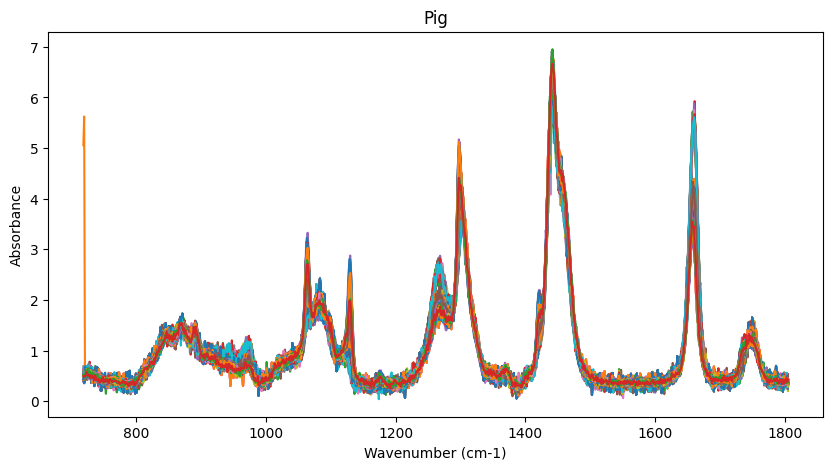

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
for i in range(1, df_pig_scaled.shape[1]):
    ax.plot(df_pig_scaled[:,0], df_pig_scaled[:,i], label='Pig ' + str(i+1))
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.show()

In [69]:
pig = np.mean(df_pig_scaled[:, 1:], axis=1)
#pig[1800:1860] = fixer(pig[1800:1860], 10)
pig_filtered = savgol_filter(pig, 20, 3)

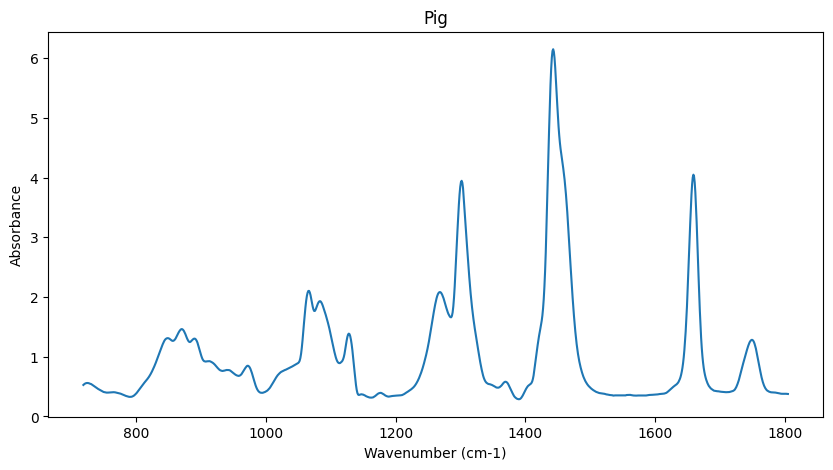

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_pig[:,0], pig_filtered)
ax.set_xlabel('Wavenumber (cm-1)')
ax.set_ylabel('Absorbance')
ax.set_title('Pig')
plt.show()

In [71]:
if not os.path.exists('./Data Lemak/preprocessed/pure fat/pig/'):
    os.makedirs('./Data Lemak/preprocessed/pure fat/pig/')
pd.DataFrame(df_pig_scaled).to_csv('./Data Lemak/preprocessed/pure fat/pig/pig_all.csv', index=False, header=False)
pd.DataFrame([df_pig[:,0], pig_filtered]).T.to_csv('./Data Lemak/preprocessed/pure fat/pig/pig_mean.csv', index=False, header=False)